# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [253]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [254]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

In [255]:
# Base url used to access the openweathermap api 
url = "http://api.openweathermap.org/data/2.5/weather?"
# Url used to actually access the api data using the provided api key
query_url = f"{url}appid={api_key}&units=imperial&q="

# Counter used to count the amount of records being called from openweathermap's api
rec_count = 0
# Empty list to store the each city's weather data
city_data = []

print("Beginning Data Retrieval")    
print("-----------------------------")
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city)
    
    # If statement used to determine wether the pull was successful and add that to the city_data list
    if str(response) == "<Response [200]>":
        rec_count +=1
        print(f"Processing Record {rec_count} of Set 1 | {city}")
        city_data.append(response.json())
    
    # Prints if there is no data on that city and leaves out the city name
    else:
        print("City not found. Skipping...")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ust-maya
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | san cristobal
Processing Record 4 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 5 of Set 1 | nemuro
City not found. Skipping...
Processing Record 6 of Set 1 | tonder
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | gboko
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | gurmatkal
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | sao felix do xingu
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | sao bento do sul
Processing Record 21 of Set 1 | mataura
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [256]:
# Creates a dataframe based on the weather collected for each city
city_data_df = pd.DataFrame(city_data)
city_data_df.drop(columns=["rain", "snow","base","cod","dt"])

# Lists to be used to hold information nested with city_data_df columns
clds = []
lat = []
lng = []
hum = []
maxt = []
spd = []
ctry = []

# Loops through the rows to collect the respective data needing to be accessed for final dataframe
for i in range(len(city_data_df['clouds'])):
    clds.append(city_data_df['clouds'][i]['all'])
    lat.append(city_data_df['coord'][i]['lat'])
    lng.append(city_data_df['coord'][i]['lon'])
    hum.append(city_data_df["main"][i]["humidity"])
    maxt.append(city_data_df["main"][i]["temp_max"])
    spd.append(city_data_df["wind"][i]["speed"])
    ctry.append(city_data_df["sys"][i]["country"])

# Creates the final, cleaned dataframe to be used for analysis 
final_city_data_df = pd.DataFrame({
    "City": city_data_df["name"],
    "Cloudiness": clds,
    "Country": ctry,    
    "Date": city_data_df["dt"],
    "Humidity": hum,
    "Lat": lat,
    "Lng":lng,
    "Max Temp": maxt,
    "Wind Speed": spd
})

# Counts the number of records for each column
final_city_data_df.count(level=None)

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [258]:
# Snapshot of the dataframe
final_city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ust-Maya,32,RU,1547308413,62,60.42,134.54,-34.17,2.71
1,Punta Arenas,40,CL,1547305200,57,-53.16,-70.91,50.00,39.15
2,San Cristobal,75,EC,1547305200,59,-0.39,-78.55,64.40,3.36
3,Ushuaia,75,AR,1547305200,81,-54.81,-68.31,48.20,34.45
4,Nemuro,12,JP,1547308415,100,43.32,145.57,26.94,22.06


In [259]:
# Saves the data to csv
final_city_data_df.to_csv(output_data_file, encoding='utf-8')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

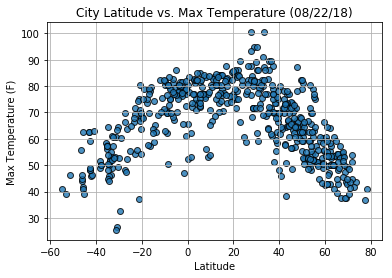

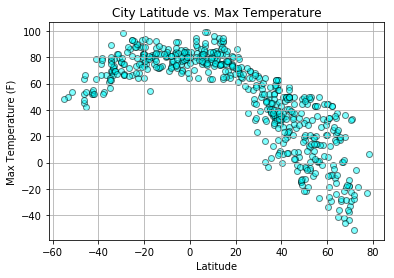

In [260]:
# Obtain the x and y coordinates for latitude and max temperature
x_lat = final_city_data_df["Lat"]
y_maxt = final_city_data_df["Max Temp"]

# Build the scatter plot
plt.scatter(x_lat,y_maxt, alpha = 0.5, c = "cyan", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save Figure
plt.savefig("LatvsTemp.png")

plt.show()

# Latitude vs. Max Temperature
Latitude appears to have an effect on max temperature. There is a negative quadratic relationship across the data points. The more extreme latitudes tend to have more extreme temperatures. This correlates with the temperatures being colder near the poles. The lack of extreme cooler temperatures for the southern hemipshere is due to both being more water in souther hemisphere acting as a heat sink and lack of habitable land in southern hemipshere.

#### Latitude vs. Humidity Plot

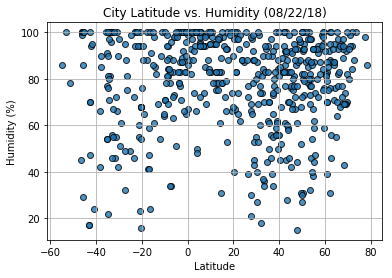

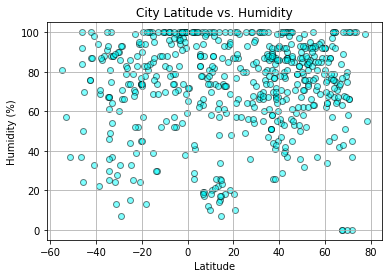

In [261]:
# Obtain the x and y coordinates for latitude and humidity
x_lat = final_city_data_df["Lat"]
y_hum = final_city_data_df["Humidity"]

# Build the scatter plot
plt.scatter(x_lat,y_hum, alpha = 0.5, c = "cyan", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save Figure
plt.savefig("LatvsHum.png")

plt.show()

# Latitude vs. Humidity
Latitude appears to have a minimal effect on the humdity in each city. The appears to be clustering around the 20 to 60 latitude points. This is most likely do to larger amount of coastal cities in the northern hemisphere, resulting in a higher humidity percentage in those 

#### Latitude vs. Cloudiness Plot

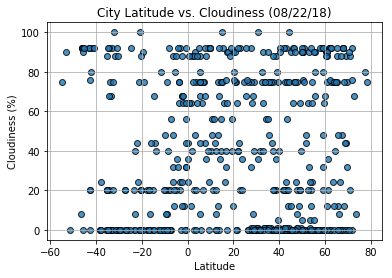

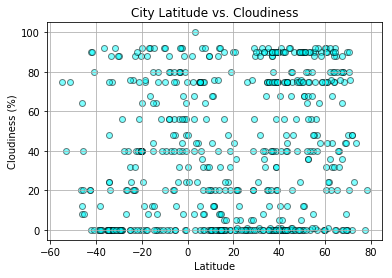

In [263]:
# Obtain the x and y coordinates for latitude and max cloudiness
x_lat = final_city_data_df["Lat"]
y_clds = final_city_data_df["Cloudiness"]

# Build the scatter plot
plt.scatter(x_lat,y_clds, alpha = 0.5, c = "cyan", edgecolors = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save Figure
plt.savefig("LatvsClds.png")

plt.show()

# Latitude vs. Cloudiness
Latitude appears to have no effect on the cloudiness in each city. The data points are randomly distributed about the graph with no bias towards the latitude extremes.

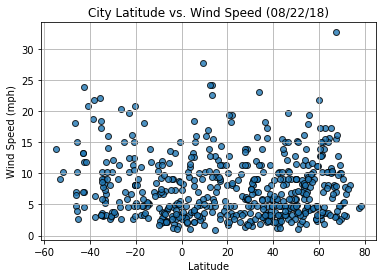

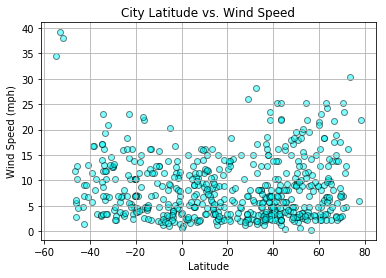

In [264]:
# Obtain the x and y coordinates for latitude and max wind speed
x_lat = final_city_data_df["Lat"]
y_wnd = final_city_data_df["Wind Speed"]

# Build the scatter plot
plt.scatter(x_lat,y_wnd, alpha = 0.5, c = "cyan", edgecolors = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save Figure
plt.savefig("LatvsWnd.png")

plt.show()

# Latitude vs. Wind Speed
Latitude appears to have no effect on the wind speed in each city. Although the more extreme latitdues appear to have higher wind speeds, in this sample, they are most likely outliers due to a lack of a quadratic relationship amongst the data points. The appears to be an almost even distribution of datapoints with wind speeds around 5 miles per hour.